In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df = pd.read_csv('marathon_results_2017.csv', index_col=0)

In [19]:
df.head().T

,0,1,2,3,4
Bib,11,17,23,21,9
Name,"Kirui, Geoffrey","Rupp, Galen","Osako, Suguru","Biwott, Shadrack","Chebet, Wilson"
Age,24,30,25,32,31
M/F,M,M,M,M,M
City,Keringet,Portland,Machida-City,Mammoth Lakes,Marakwet
State,NaN,OR,NaN,CA,NaN
Country,KEN,USA,JPN,USA,KEN
Citizen,NaN,NaN,NaN,NaN,NaN
Unnamed: 9,NaN,NaN,NaN,NaN,NaN
5K,0:15:25,0:15:24,0:15:25,0:15:25,0:15:25


In [20]:
df.columns

Index(['Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen',
       'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K',
       '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall', 'Gender',
       'Division'],
      dtype='object')

In [21]:
df.dtypes

Bib              object
Name             object
Age               int64
M/F              object
City             object
State            object
Country          object
Citizen          object
Unnamed: 9       object
5K               object
10K              object
15K              object
20K              object
Half             object
25K              object
30K              object
35K              object
40K              object
Pace             object
Proj Time        object
Official Time    object
Overall           int64
Gender            int64
Division          int64
dtype: object

In [22]:
df_aux = pd.DataFrame([[15279, "Catuogno, Marina", 47, "F", "Cordoba", "NaN", "ARG", "NaN", "NaN", "0:29:58", "1:00:24", "1:33:48", "2:05:00", "2:12:11", "2:38:09", "3:11:34", "3:47:58", "4:27:22", "00:10:52", "NaN", "4:44:33", 30983, 10673, 1337]], columns=df.columns)
df_aux

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,15279,"Catuogno, Marina",47,F,Cordoba,NaN,ARG,NaN,NaN,0:29:58,...,2:38:09,3:11:34,3:47:58,4:27:22,00:10:52,NaN,4:44:33,30983,10673,1337


In [23]:
df = df.append(df_aux)

How many null values?

In [24]:
df.isnull().sum()

Bib                  0
Name                 0
Age                  0
M/F                  0
City                 0
State             3595
Country              0
Citizen          25156
Unnamed: 9       26319
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time            0
Official Time        0
Overall              0
Gender               0
Division             0
dtype: int64

In [25]:
df['Unnamed: 9'].value_counts()

VI     54
MI     37
NaN     1
Name: Unnamed: 9, dtype: int64

In [26]:
df['Proj Time'].value_counts()

-      26410
NaN        1
Name: Proj Time, dtype: int64

In [27]:
#df.drop(['Unnamed: 0', 'Proj Time'], axis=1, inplace=True)

In [28]:
df['Citizen'].value_counts()[:10]

GBR    141
CAN    131
JPN    115
CHN     78
USA     74
IRL     72
MEX     69
FRA     50
GER     46
AUS     35
Name: Citizen, dtype: int64

In [29]:
df.loc[df['Citizen'].isnull() == False, ['Name', 'City', 'State', 'Country', 'Citizen']][:10]

,Name,City,State,Country,Citizen
16,"Kisri, Rachid",Briarcliff Manor,NY,USA,MAR
18,"Ndhlovu, Pardon",Vilas,NC,USA,ZIM
21,"Chipsiya, Christopher K.",Zacatecas,NaN,MEX,KEN
49,"Varela, Jonnathan",Spring,TX,USA,CRC
60,"O'Leary, Paddy C",San Francisco,CA,USA,IRL
66,"Fallas Navarro, Juan R.",Shasta Lake,CA,USA,CRC
73,"Trimaille, Johan",Quebec,QC,CAN,FRA
177,"Tongue, Patrick K.",Zeiningen,NaN,SUI,AUS
182,"Battoo, Christopher",Boston,MA,USA,TRI
206,"Finlay, Gavin",Durham,NC,USA,IRL


In [30]:
df.columns

Index(['Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen',
       'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K',
       '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall', 'Gender',
       'Division'],
      dtype='object')

In [31]:
cols_to_transform = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']

In [33]:
for c in cols_to_transform:
    df[c] = df[c].apply(pd.to_timedelta)

In [34]:
sns.set_style('darkgrid')

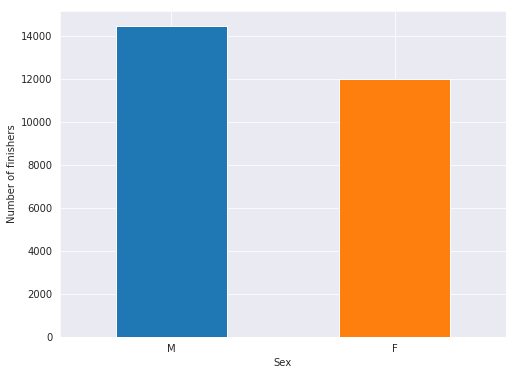

In [35]:
ax = df['M/F'].value_counts().plot(kind='bar', rot=360, figsize=(8, 6))
ax.set_xlabel('Sex')
ax.set_ylabel('Number of finishers');

In [36]:
df['Age'].describe()

count    26411.000000
mean        42.587899
std         11.419283
min         18.000000
25%         34.000000
50%         43.000000
75%         51.000000
max         84.000000
Name: Age, dtype: float64

In [37]:
df['Age'].mean()

42.58789898148499

In [38]:
df['Age'].median()

43.0

In [39]:
df['Age'].std()

11.419283087027523

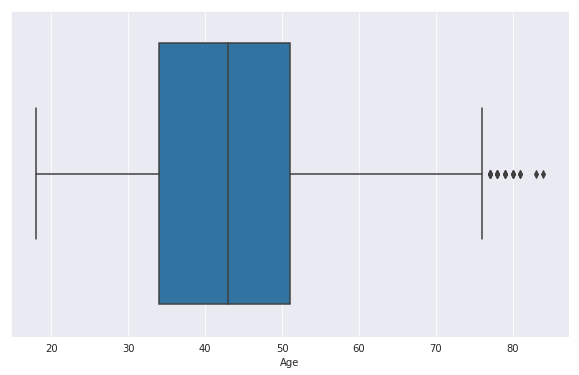

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df['Age'], ax=ax);

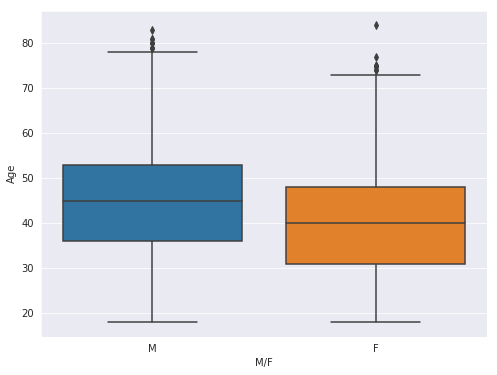

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='M/F', y='Age', data=df, ax=ax);

In [42]:
df['Age'].value_counts()

45    1127
46     976
40     926
47     844
50     815
41     801
35     800
48     784
42     758
36     733
39     712
43     706
37     687
49     686
55     682
38     670
51     658
44     651
52     638
29     636
30     629
33     591
28     590
31     583
53     573
27     571
32     563
26     557
34     540
56     504
      ... 
58     345
23     307
59     284
62     271
22     210
65     187
63     157
21     147
66     137
64     117
67     100
20      83
70      78
68      67
69      47
19      43
71      25
73      22
18      20
72      19
74      17
75      15
76      10
77       5
78       4
80       3
79       3
81       2
83       1
84       1
Name: Age, Length: 66, dtype: int64

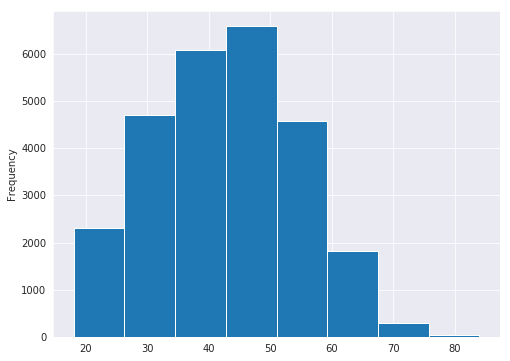

In [60]:
df['Age'].plot(kind='hist', rot=360, figsize=(8, 6), bins=8);

/home/rcrespillo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


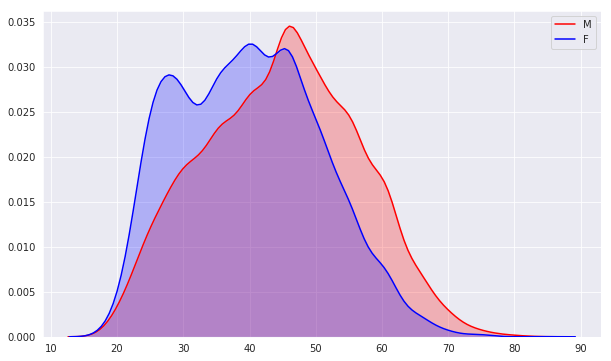

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
p1=sns.kdeplot(df.loc[df['M/F'] == 'M', 'Age'], shade=True, color="r", ax=ax, label='M')
p1=sns.kdeplot(df.loc[df['M/F'] == 'F', 'Age'], shade=True, color="b", ax=ax, label='F')

In [45]:
df['Country'].value_counts()[:10]

USA    20945
CAN     1870
GBR      425
MEX      285
CHN      242
GER      226
BRA      205
AUS      191
JPN      170
ITA      165
Name: Country, dtype: int64

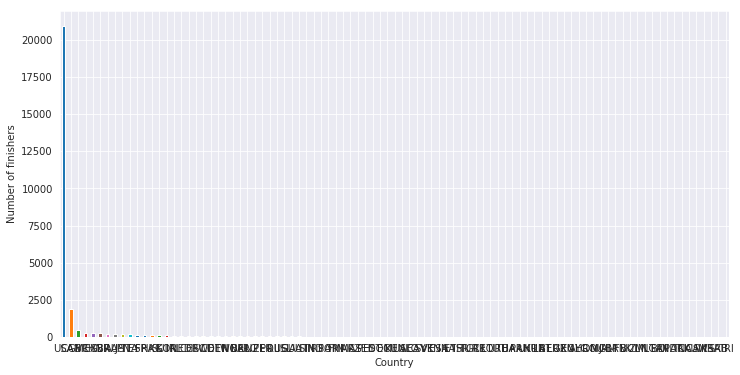

In [46]:
ax = df['Country'].value_counts().plot(kind='bar', rot=360, figsize=(12, 6))
ax.set_xlabel('Country')
ax.set_ylabel('Number of finishers');

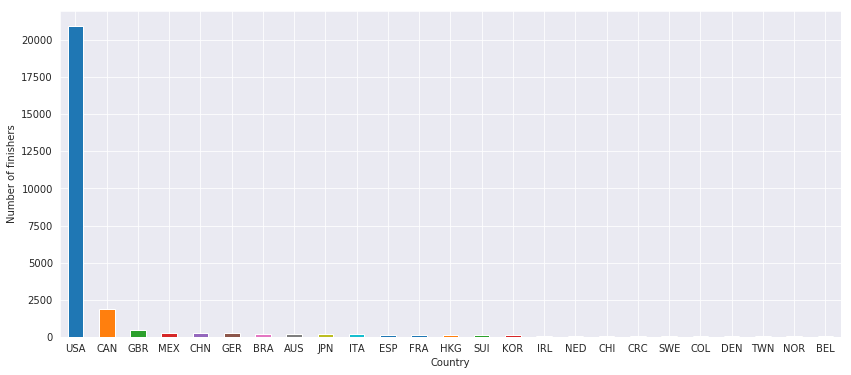

In [47]:
ax = df['Country'].value_counts()[:25].plot(kind='bar', rot=360, figsize=(14, 6))
ax.set_xlabel('Country')
ax.set_ylabel('Number of finishers');

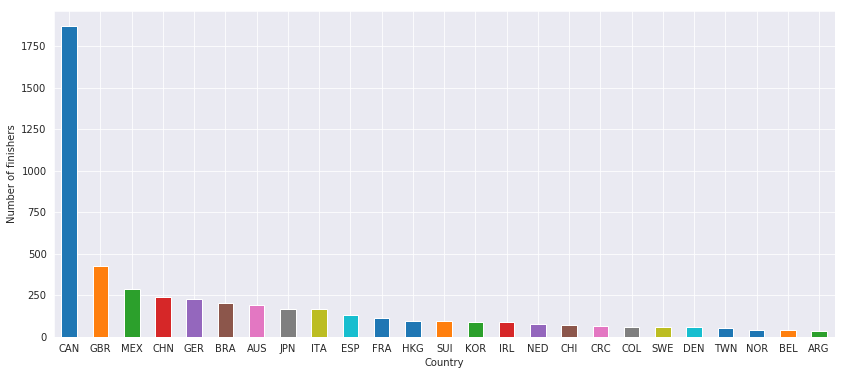

In [48]:
ax = df.loc[df['Country'] != 'USA', 'Country'].value_counts()[:25].plot(kind='bar', rot=360, figsize=(14, 6))
ax.set_xlabel('Country')
ax.set_ylabel('Number of finishers');

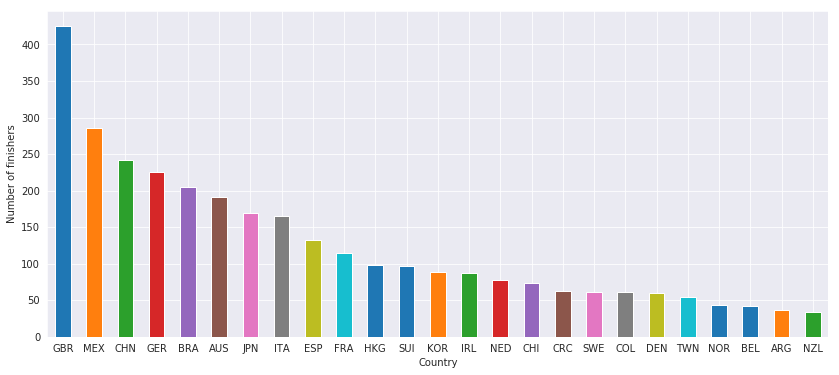

In [49]:
ax = df.loc[(df['Country'] != 'USA') & (df['Country'] != 'CAN'), 'Country'].value_counts()[:25].plot(kind='bar', rot=360, figsize=(14, 6))
ax.set_xlabel('Country')
ax.set_ylabel('Number of finishers');

In [50]:
df['Half_2'] = df['Official Time'] - df['Half']

In [51]:
df.dtypes

Bib                       object
Name                      object
Age                        int64
M/F                       object
City                      object
State                     object
Country                   object
Citizen                   object
Unnamed: 9                object
5K               timedelta64[ns]
10K              timedelta64[ns]
15K              timedelta64[ns]
20K              timedelta64[ns]
Half             timedelta64[ns]
25K              timedelta64[ns]
30K              timedelta64[ns]
35K              timedelta64[ns]
40K              timedelta64[ns]
Pace             timedelta64[ns]
Proj Time                 object
Official Time    timedelta64[ns]
Overall                    int64
Gender                     int64
Division                   int64
Half_2           timedelta64[ns]
dtype: object

In [52]:
#fig, ax = plt.subplots(figsize=(10, 6))
#sns.boxplot(x=df['Half'], ax=ax);

In [53]:
len(df.loc[df['Half'] == '00:00:00'])

17

In [58]:
df_m = df.tail(1)
df_m

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Half_2
0,15279,"Catuogno, Marina",47,F,Cordoba,NaN,ARG,NaN,NaN,00:29:58,...,03:11:34,03:47:58,04:27:22,00:10:52,NaN,04:44:33,30983,10673,1337,02:32:22


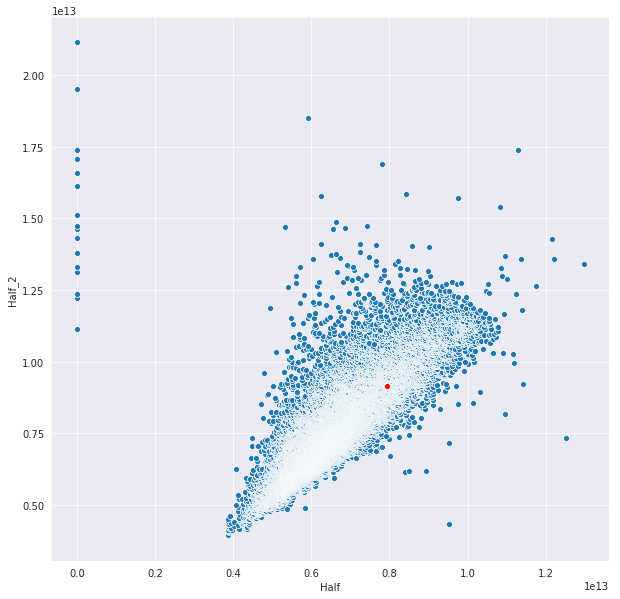

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='Half', y='Half_2', data=df, ax=ax);
sns.scatterplot(x='Half', y='Half_2', data=df_m, ax=ax, color="red");

In [55]:
tmp_df = pd.DataFrame({'Half': [0, 1, 1.5e13],
                       'Half_2': [0, 1, 1.5e13]})

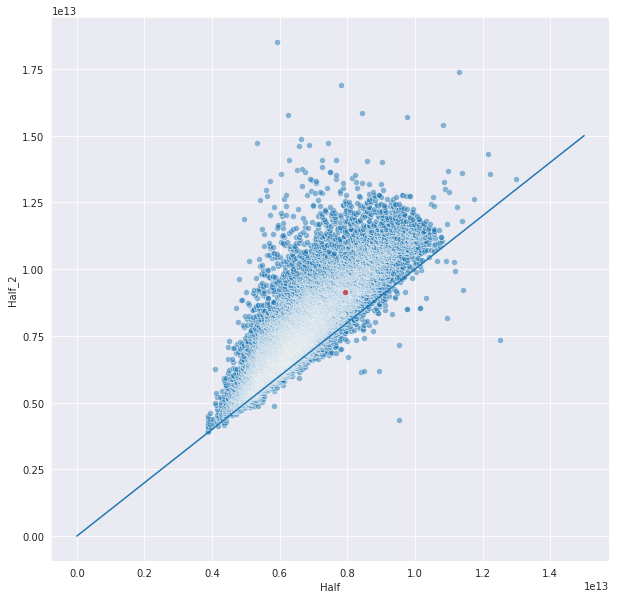

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))
p = sns.scatterplot(x='Half', y='Half_2', data=df.loc[df['Half'] > '0'], ax=ax, alpha=0.5);
p = sns.scatterplot(x='Half', y='Half_2', data=df_m, ax=ax, alpha=0.5, color="red");
p = sns.lineplot(x='Half', y='Half_2', data=tmp_df, ax=ax, )

In [57]:
df

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Half_2
0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,00:15:25,...,01:33:01,01:48:19,02:02:53,00:04:57,-,02:09:37,1,1,1,01:05:02
1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,00:15:24,...,01:33:01,01:48:19,02:03:14,00:04:58,-,02:09:58,2,2,2,01:05:23
2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,00:15:25,...,01:33:01,01:48:31,02:03:38,00:04:59,-,02:10:28,3,3,3,01:05:52
3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,00:15:25,...,01:33:01,01:48:58,02:04:35,00:05:03,-,02:12:08,4,4,4,01:07:23
4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,00:15:25,...,01:33:01,01:48:41,02:05:00,00:05:04,-,02:12:35,5,5,5,01:08:00
5,15,"Abdirahman, Abdi",40,M,Phoenix,AZ,USA,NaN,NaN,00:15:25,...,01:33:01,01:48:52,02:05:21,00:05:04,-,02:12:45,6,6,1,01:08:10
6,63,"Maiyo, Augustus K.",33,M,Colorado Springs,CO,USA,NaN,NaN,00:15:25,...,01:33:01,01:49:06,02:05:41,00:05:05,-,02:13:16,7,7,6,01:08:40
7,7,"Sefir, Dino",28,M,Addis Ababa,NaN,ETH,NaN,NaN,00:15:24,...,01:34:52,01:51:11,02:07:09,00:05:08,-,02:14:26,8,8,7,01:08:22
8,18,"Puskedra, Luke",27,M,Eugene,OR,USA,NaN,NaN,00:15:24,...,01:34:05,01:50:53,02:07:17,00:05:09,-,02:14:45,9,9,8,01:09:52
9,20,"Ward, Jared",28,M,Kaysville,UT,USA,NaN,NaN,00:15:25,...,01:33:49,01:50:44,02:07:54,00:05:11,-,02:15:28,10,10,9,01:10:35
